# Python for Chemical Reaction Engineering Part 4 - Logic, loops, and defined functions

Now we will talk about some key operations you will run across

## Logic: If statements

Oftentimes you want to make something happen *conditionally.*

For example: say we want to eat at most 3 cookies for dinner. If you have had less than 3, you can have another. You can use an if/then statement to tell you what to do depending on how many cookies you have had:

    max_cookies = 3
    had_cookies = 1

    if had_cookies < max_cookies:
        print('You can have another cookie.')
    elif had_cookies == max_cookies:
        print('You have had the perfect amount of cookies; you should not have another.')    
    elif had_cookies > max_cookies:
        print('You have had too many cookies; you should have checked sooner!')
    if had_cookies > 0:
        print('Also it is great that you have any cookies; I do not right now and am jealous.')   

There are a few things to point out here. First, this all starts with 'if'. Then a logic statament is written and ends with a colon :. The next line is indented, which is *very* important. Anything indented *immediately* followed the if statement will occur *if* the condition is met.

Next note what happens if the condition is not met. We use 'elif' to say **el**se **if** and then provide another statment. These can be chained together multiple times.

Next note that all of the simple 'if' statements are checked. Multiple will be executed if multiple are met.

Play around below with the number of 'max' and 'had' cookies to see what happens in the output.

In [11]:
max_cookies = 3
had_cookies = 1

if had_cookies < max_cookies:
    print('You can have another cookie.')
elif had_cookies == max_cookies:
    print('You have had the perfect amount of cookies; you should not have another.')    
elif had_cookies > max_cookies:
    print('You have had too many cookies; you should have checked sooner!')
if had_cookies > 0:
    print('Also it is great that you have any cookies; I do not right now and am jealous.')

You can have another cookie.
Also it is great that you have any cookies; I do not right now and am jealous.


## Loops

Oftentimes it is useful to perform the same operation repeatedly. We can do this with **loops**, most notably the **'for' loop** and the **'while' loop**.

### For loops

'For' loops use a list as an input and then iterate through the list. At each entry, a list of commands is executed. For example:
    
    x = [1,3,4,12]
    for i in x:
        print(i)
  

In [30]:
x = [1,3,4,12]
for i in x:
    print(i)

1
3
4
12


Sometimes we want not just the **value** of the iteration, but also the **count**. We can pull both out simultaneously with the **enumerate()** function. For example:

    for count, value in enumerate(x):
        print('\nIndex',index)
        print('Value',value)

In [24]:
for index, value in enumerate(x):
    print('\nIndex',index)
    print('Value',value)


Index 0
Value 1

Index 1
Value 3

Index 2
Value 4

Index 3
Value 12


Combining this with 'if' statements allows you to do things like find all entries in a list that meet a certain criterion, and make a new list containing only these entries.

    species = ['methane','ethane','ethene','CO','butane']    
    alkanes = []

    for x in species:
        if 'ane' in x:
              alkanes.append(x)

    print(alkanes)

In [32]:
species = ['methane','ethane','ethene','CO','butane']    
alkanes = []

for x in species:
    if 'ane' in x:
          alkanes.append(x)

print(alkanes)

['methane', 'ethane', 'butane']


### List comprehension

A compact way of working with 'for' loops is list comprehension. Four of the lines in the last example can be collapsed into one as follows:

    species = ['methane','ethane','ethene','CO','butane']  
    alkanes = [x for x in species if 'ane' in x]
    print(alkanes)

In [33]:
species = ['methane','ethane','ethene','CO','butane']  
alkanes = [x for x in species if 'ane' in x]
print(alkanes)

['methane', 'ethane', 'butane']


### While loops

A 'while' loop is like a 'for' loop but removes the requirement of incrementing through a list. Instead you pick a criterion to satisfy and continue repeating the loop until that happens. It is therefore **possible that a while loop never ends**.

In the simplest case, it looks like a 'for' loop and tells you to increase the index a list by 1 until you get to the end of the list. For example:

    x = [1,3,4,12]
    index = 0

    while index < len(x):
        print(x[index])
        index = index + 1

In [53]:
x = [1,3,4,12]
index = 0

while index < len(x):
    print(x[index])
    index = index + 1

1
3
4
12


Consider another example relevant to this course. Perhaps you want to run a reaction and stop it as soon as the concentration of the product reaches a certain level. We have not yet discussed everything that goes into the following, but we will. We will also have more more computationally efficient codes than the one below, but it is easier to see what is happening in the one below.

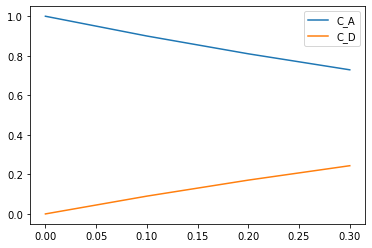

In [2]:
import matplotlib.pyplot as plt

# Reaction: A -> D with r = k * C_A
k = 1 # 1 / hr

C_A = [1]
C_D = [0]
t = [0]

t_step = 0.1

def diff(t,U): 
    C_A = U[0]
    C_D = U[1]    
    dU=np.zeros(len(U))    
    dU[0] = -k*C_A
    dU[1] = k*C_A

while max(C_D) < 0.2:   
    C_A.append(C_A[-1]-k*C_A[-1]*t_step)
    C_D.append(C_D[-1]+k*C_A[-1]*t_step)
    t.append(t[-1]+t_step)

plt.plot(t,C_A)
plt.plot(t,C_D)
plt.legend(['C_A','C_D'])
plt.show()